# Make local plots for the electrostatic paper from datafiles and save as pdf

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.use('agg')

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:1312: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
import matplotlib.pyplot as plt
from matplotlib import ticker, gridspec
from matplotlib.patches import RegularPolygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import pickle
import kwant

In [3]:
hbar = 1.055e-34
m = 9.109e-31
meff = 0.014*m
akwant, aFEM = 2.5e-9, 5e-9
eV, e = 1.6023e-19, 1.6023e-19
eps0 = 8.854e-12
gamma = hbar**2/(2*meff*akwant**2)

In [15]:
def latex(x, pos=None):
    return '${}$'.format(x)


def set_ticks(ax, xticks=(), yticks=(), logx=False, logy=False):
    """Add latex ticks to an Axes instance optionally setting log-scale."""
    if logx:
        ax.set_xscale('log')
        xfmt = '$10^{{{}}}'
        xvals = [10**i for i in xticks]
    else:
        xfmt = '${}$'
        xvals = xticks

    if logy:
        ax.set_yscale('log')
        yfmt = '$10^{{{}}}'
        yvals = [10**i for i in yticks]
    else:
        yfmt = '${}$'
        yvals = yticks

    if xticks is not None:
        ax.set_xticks(xvals)
        ax.set_xticklabels([xfmt.format(i) for i in xticks])

    if yticks is not None:
        ax.set_yticks(yvals)
        ax.set_yticklabels([yfmt.format(i) for i in yticks])


def plot_energy_levels():
    with open("data_energy_levels.p", 'rb') as fp:
        energy_dict = pickle.load(fp)
        environment_parameters = pickle.load(fp)
        V_G_range = pickle.load(fp)
        V_G_range_zoom = pickle.load(fp)

    fig = plt.figure()
    fig.set_size_inches(7.05, 12)

    ax1 = fig.add_subplot(411)
    energy_matrix = energy_dict['No SC']
    length = len(energy_matrix[0, :])
    V_G_cut = environment_parameters[0]['V_G']
    plt.hold(True)
    for j in range(length):
        color = plt.cm.gist_heat(j/float(length))
        ax1.plot(V_G_range, energy_matrix[:, j], 'k', color=color, lw=2)
    ax1.plot(V_G_range, np.zeros(len(energy_matrix[:,0])), 'k', lw=2)
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.tick_params(size=8, width=2, labelsize=25)
    ax1.set_ylim(-100, 300)
    ax1.set_ylabel('$E \ \mathrm{[meV]}$', fontsize=25)
    ax1.text(0.79, 0.61, '$\mathrm{No \ SC \ lead}$',
             horizontalalignment='center', transform=ax1.transAxes, fontsize=30)
    ax1.text(0.9, 0.85, '$\mathrm{(a)}$', horizontalalignment='center', 
             transform=ax1.transAxes, fontsize=30)
    yticks = [0, 200]
    set_ticks(ax1, yticks=yticks)
    ax1.vlines(x=V_G_cut, ymin=-100, ymax=300, color='r')
    
    ax_inset = fig.add_axes([0.2, 0.856, 0.27, 0.13])
    energy_matrix = energy_dict['No SC zoom']
    length = len(energy_matrix[0, :])
    for j in range(length):
        color = plt.cm.gist_heat(j/float(length))
        ax_inset.plot(V_G_range_zoom, energy_matrix[:, j], 'k', color=color, lw=2)
    ax_inset.plot(V_G_range_zoom, np.zeros(len(energy_matrix[:,0])), 'k', lw=2)
    ax_inset.set_ylim(-50, 20)
    ax_inset.set_xlim(0.1, 0.4)
    ax_inset.yaxis.tick_right()
    xticks = np.arange(0.2, 0.5, 0.2)
    yticks = [-50, 0]
    set_ticks(ax_inset, xticks, yticks)
    ax_inset.tick_params(size=6, width=1.5, labelsize=20)
    
    mark_inset(ax1, ax_inset, loc1=1, loc2=3, fc="none", ec="0.3", zorder=10)

    ax2 = fig.add_subplot(412)
    energy_matrix = energy_dict['0V, 233nm, non-selfc']
    length = len(energy_matrix[0, :])
    V_G_cut = environment_parameters[1]['V_G']
    plt.hold(True)
    for j in range(length):
        color = plt.cm.gist_heat(j/float(length))
        ax2.plot(V_G_range, energy_matrix[:, j], 'k', color=color, lw=2)
    ax2.plot(V_G_range, np.zeros(len(energy_matrix[:,0])), 'k', lw=2)
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.tick_params(width=2, size=8, labelsize=25)
    ax2.set_ylim(-100, 300)
    ax2.set_ylabel('$E \ \mathrm{[meV]}$', fontsize=25)
    ax2.text(0.23, 0.37, '$V_{\mathrm{SC}} = 0 \ \mathrm{V}$',
             horizontalalignment='center', transform=ax2.transAxes, fontsize=30)
    ax2.text(0.30, 0.11, '$\mathrm{No \ charge \ screening}$',
             horizontalalignment='center', transform=ax2.transAxes, fontsize=25)
    ax2.text(0.9, 0.85, '$\mathrm{(b)}$', horizontalalignment='center', 
             transform=ax2.transAxes, fontsize=30)
    yticks = [0, 200]
    set_ticks(ax2, xticks=None, yticks=yticks)
    ax2.vlines(x=V_G_cut, ymin=-100, ymax=300, color='r')

    ax3 = fig.add_subplot(413)
    energy_matrix = energy_dict['0V, 233nm']
    length = len(energy_matrix[0, :])
    V_G_cut = environment_parameters[1]['V_G']
    plt.hold(True)
    for j in range(length):
        color = plt.cm.gist_heat(j/float(length))
        ax3.plot(V_G_range, energy_matrix[:, j], 'k', color=color, lw=2)
    ax3.plot(V_G_range, np.zeros(len(energy_matrix[:,0])), 'k', lw=2)
    plt.setp(ax3.get_xticklabels(), visible=False)
    ax3.tick_params(width=2, size=8, labelsize=25)
    ax3.set_ylim(-100, 300)
    ax3.set_ylabel('$E \ \mathrm{[meV]}$', fontsize=25)
    ax3.text(0.23, 0.37, '$V_{\mathrm{SC}} = 0 \ \mathrm{V}$',
             horizontalalignment='center', transform=ax3.transAxes, fontsize=30)
    ax3.text(0.9, 0.85, '$\mathrm{(c)}$', horizontalalignment='center', 
             transform=ax3.transAxes, fontsize=30)
    yticks = [0, 200]
    set_ticks(ax3, xticks=None, yticks=yticks)
    ax3.vlines(x=V_G_cut, ymin=-100, ymax=300, color='r')

    ax4 = fig.add_subplot(414, sharex=ax1)
    energy_matrix = energy_dict['02V, 233nm']
    length = len(energy_matrix[0, :])
    V_G_cut = environment_parameters[2]['V_G']
    plt.hold(True)
    for j in range(length):
        color = plt.cm.gist_heat(j/float(length))
        ax4.plot(V_G_range, energy_matrix[:, j], 'k', color=color, lw=2)
    ax4.plot(V_G_range, np.zeros(len(energy_matrix[:,0])), 'k', lw=2)
    ax4.tick_params(size=8, width=2, labelsize=25)
    ax4.set_xlabel('$V_{\mathrm{G}} \ \mathrm{[V]}$', fontsize=25)
    ax4.set_ylabel('$E \ \mathrm{[meV]}$', fontsize=25)
    ax4.set_ylim(-100, 300)
    ax4.text(0.6, 0.7, '$V_{\mathrm{SC}} = 0.2 \ \mathrm{V}$',
             horizontalalignment='center', transform=ax4.transAxes, fontsize=30)
    ax4.text(0.9, 0.85, '$\mathrm{(d)}$', horizontalalignment='center', 
             transform=ax4.transAxes, fontsize=30)
    xticks = [-1, -0.5, 0, 0.5, 1]
    yticks = [0, 200]
    set_ticks(ax4, xticks=xticks, yticks=yticks)
    ax4.vlines(x=V_G_cut, ymin=-100, ymax=300, color='r')

    #plt.subplots_adjust(hspace = .05)
    plt.tight_layout()
    plt.savefig('energy_levels.pdf')


def plot_dos_fields():
    with open("data_dos_fields.p", 'rb') as fp:
        density_dict = pickle.load(fp)
        raw_density_dict = pickle.load(fp)
        pot_lines_dict = pickle.load(fp)
        site_pos = pickle.load(fp)

    kw_str = ['No SC', '0V, 233nm, non-selfc', '0V, 233nm', '02V, 233nm']
    title_str = ['$\mathrm{No \ SC \ lead}$',
                 '$V_{\mathrm{SC}} = 0 \ \mathrm{V}$',
                 '$V_{\mathrm{SC}} = 0 \ \mathrm{V}$',
                 '$V_{\mathrm{SC}} = 0.2 \ \mathrm{V}$']
    panel_num = ['$(\mathrm{{{}}})$'.format(i) for i in 'abcd']
    vmin_dens = min([min(a) for a in raw_density_dict.values()])
    vmax_dens = max([max(a) for a in raw_density_dict.values()])

    limx = 10
    factor = np.sqrt(3) / 2
    limy = limx * factor

    arr_max = []
    arr_min = []
    for kw in kw_str:
        pot_lines = np.array(pot_lines_dict[kw])
        zi = kwant.plotter.mask_interpolate(site_pos, pot_lines,
                                            oversampling=1)[0]
        E = Ex, Ey = np.gradient(-zi)
        arr_max.append(np.ma.max(E)/(1.25*0.001))
        arr_min.append(np.ma.max(E)/(1.25*0.001))

    vmax = max(arr_max)
    vmin = min(arr_min)

    fig, axes = plt.subplots(2, 2, figsize=(7, 6),
                             subplot_kw={'aspect':'auto'})
    for ax, kw, panel, title in zip(axes.flatten(), kw_str, panel_num,
                                    title_str):
        ax.axis('off')
        ax.set_title(title, fontsize=25, y=1.03)
        border_size = .5
        ax.set_ylim(-limy - border_size, limy + border_size)
        ax.set_xlim(-limx - border_size, limx + border_size)
        Z = density_dict[kw]
        ax.imshow(Z.T, cmap=plt.get_cmap('gist_heat_r'),
                  interpolation='bilinear', extent=[-limx, limx, -limy, limy],
                  aspect='equal', origin='lower', vmax=vmax_dens,
                  vmin=vmin_dens, zorder=-2)
        wire_contour = RegularPolygon(xy=(0, 0), numVertices=6, radius=10.,
                                      edgecolor='k', fill=False, linewidth=5,
                                      capstyle='round', orientation=np.pi/2)
        ax.add_patch(wire_contour)
        ax.text(-0.04, 0.9, panel, transform=ax.transAxes, fontsize=25)

        pot_lines = np.array(pot_lines_dict[kw])
        zi = kwant.plotter.mask_interpolate(site_pos, pot_lines,
                                            oversampling=1)[0]
        E = Ex, Ey = np.gradient(-zi)
        E = np.linalg.norm(E, axis=0)
        E /= 1.25*0.001*np.max(E)
        color = np.minimum(E, np.percentile(E, 65)).T
        # Shrink the field lines a bit to avoid overlap with the edges.
        field_border = -.6
        xvals = np.linspace(-limx - field_border, limx + field_border,
                            num=Ey.shape[0])
        yvals = np.linspace(-limy - field_border, limy + field_border,
                            num=Ey.shape[1])
        norm = matplotlib.colors.Normalize(vmax=vmax, vmin=vmin)
        lines = ax.streamplot(xvals, yvals , Ex.T, Ey.T, density=0.5,
                              arrowsize=1.5, color=color, cmap='winter_r',
                              norm=norm, zorder=-1)

    ax = axes[0, 0]
    ax.annotate(s='', xy=(-limx + .4, 0), xytext=(0, 0),
                arrowprops=dict(linewidth=1.5, color='k', headwidth=12))
    ax.annotate(s='', xy=(limx - .4, 0), xytext=(0, 0),
                arrowprops=dict(linewidth=1.5, color='k', headwidth=12))
    ax.text(0.5, 0.56, '$100 \ \mathrm{nm}$', horizontalalignment='center',
            transform=ax.transAxes, fontsize=23)

    cbar_tick_params = dict(labelsize=18, width=2, length=7)
    fig.subplots_adjust(right=0.8)
    # alignment hor, alignment vert, thickness, size
    cbar_ax = fig.add_axes([0.815, 0.523, 0.03, 0.378])
    cbar_ax.tick_params(**cbar_tick_params)
    ticks = range(3)
    cb1 = fig.colorbar(axes[0, 1].images[0], cax=cbar_ax, ticks=[i * 1e17 for i
                                                                 in ticks] )
    cb1.set_ticklabels([latex(i) for i in ticks])
    cb1.set_label(r"$n \ [10^{17}/\mathrm{cm}^3]}$", fontsize=20)

    fig.subplots_adjust(right=0.8)
    #alignment hor, alignment vert, thickness, size
    cbar_ax2 = fig.add_axes([0.815, 0.123, 0.03, 0.378])
    cbar_ax2.tick_params(**cbar_tick_params)
    ticks = range(3, 10, 3)
    cb2 = fig.colorbar(lines.lines, cax=cbar_ax2, ticks=ticks)
    cb2.set_label(r"$E \ [\mathrm{mV/nm}]$", fontsize=20)
    cb2.set_ticklabels([latex(i) for i in ticks])

    plt.subplots_adjust(hspace=0.3)
    plt.subplots_adjust(wspace=0.1)
    plt.savefig('screening_spatial.pdf')
    

def dispersion(k, E_n, E_Z, alpha):
    E_plus = E_n + k**2 + np.sqrt(E_n**2 + E_Z**2 + (alpha*k)**2)
    E_minus = E_n + k**2 - np.sqrt(E_n**2 + E_Z**2 + (alpha*k)**2)
    return E_plus, E_minus


def plot_mu_single_band():
    k = np.linspace(-7, 7, 1000)
    E_Z_arr = [4, 9, 14]
    color_code_plus = ['g-', 'g--', 'g--']
    color_code_minus = ['r-', 'r--', 'r--']
    
    with open("data_mu_single_band.p", 'rb') as fp:
        Ez_range = pickle.load(fp)
        mu_pert_dict = pickle.load(fp)
        dn_dict = pickle.load(fp)

    parameters = ((0, 233), (0.2, 233), (0, 100),
                  (0.2, 100), (0, 60), (0.2, 60))
    kw_str = ['No SC'] + ['{V}V, {SO}nm'.format(V=V, SO=SO).replace('.', '')
                          for V, SO in parameters]
    title_template = (r'V_{{SC}} = {V} \ \mathrm{{V}}, \ l_{{\mathrm{{SO}}}} '
                      '= {SO} \ \mathrm{{nm}}')
    title_str = ['$\mathrm{No \ SC \ lead}$'] + \
                [title_template.format(V=V, SO=SO) for V, SO in parameters]
    clr_str = ['g-', 'k-', 'k--', 'r-', 'r--', 'b-', 'b--']

    Ez_range_scaled = [1000*gamma/eV*a for a in Ez_range]

    fig = plt.figure()
    fig.set_size_inches(7.5, 10)
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1.7]) 


    ax1 = fig.add_subplot(gs[0])
    ax1.hold(True)
    for i, kw in enumerate(kw_str):
        mu_pert_arr_scaled = 1000*gamma/eV*np.array(mu_pert_dict[kw])
        ax1.plot(Ez_range_scaled, mu_pert_arr_scaled, clr_str[i],
                 label=title_str[i], lw=3)
    ax1.set_ylabel('$\mu \ \mathrm{[meV]}$', fontsize=25)
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.set_xlim(0, 7)
    ax1.set_ylim(-5, 0.5)
    yticks = [-5, 0]
    set_ticks(ax1, xticks=None, yticks=yticks)
    ax1.tick_params(size=8, width=2, labelsize=25)
    
    
    ax2 = fig.add_subplot(gs[1], sharex=ax1)
    ax2.hold(True)
    for i, kw in enumerate(kw_str):
        ax2.plot(Ez_range_scaled, 1000/2.5*np.array(dn_dict[kw]), clr_str[i],
                 label=title_str[i], lw=3)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
    ax2.set_xlabel('$E_{\mathrm{Z}} \ \mathrm{[meV]}$', fontsize=25)
    ax2.set_ylabel('$\Delta n \ \mathrm{[e/\mu m]}$', fontsize=25)
    ax2.set_xlim(0, 7)
    ax2.set_ylim(-1, 11)
    xticks = [0, 2, 4, 6]
    yticks = [0, 10]
    set_ticks(ax2, xticks, yticks)
    ax2.tick_params(size=8, width=2, labelsize=25)

    
    alpha = 6
    ax3 = fig.add_subplot(3, 2, 5)
    ax3.axis('off')
    for i, E_Z in enumerate(E_Z_arr):
        dispersion_plus, dispersion_minus = dispersion(k, 0, E_Z, alpha)[:2]
        ax3.plot(k, dispersion_plus, color_code_plus[i], lw=2)
        ax3.plot(k, dispersion_minus, color_code_minus[i], lw=2)
    ax3.hlines(y=0, xmin=min(k), xmax=max(k), color='k', lw=1.7)
    ax3.vlines(x=0, ymin=(min(dispersion_minus) - 3),
               ymax=(max(dispersion_plus) + 4), color='k', lw=1.7)
    ax3.set_ylim(-17, 20)
    ax3.text(0.94, 0.25, '$k$', horizontalalignment='center',\
             transform=ax3.transAxes, fontsize=30)
    ax3.text(0.43, 1.05, '$E$', horizontalalignment='center',\
             transform=ax3.transAxes, fontsize=30, rotation=90)
    ax3.set_aspect(0.30)

    alpha = 0
    ax4 = fig.add_subplot(3, 2, 6)
    ax4.axis('off')
    for i, E_Z in enumerate(E_Z_arr):
        dispersion_plus, dispersion_minus = dispersion(k, 0, E_Z, alpha)[:2]
        ax4.plot(k, dispersion_plus, color_code_plus[i], lw=2)
        ax4.plot(k, dispersion_minus, color_code_minus[i], lw=2)
    ax4.hlines(y=0, xmin=min(k) + 1, xmax=max(k) - 1, color='k', lw=1.7)
    ax4.vlines(x=0, ymin=(min(dispersion_minus) - 3), ymax =
               (max(dispersion_plus) + 4), color='k', lw=1.7)
    ax4.set_ylim(-17, 20)
    ax4.text(0.9, 0.25, '$k$', horizontalalignment='center',\
             transform=ax4.transAxes, fontsize=30)
    ax4.text(0.43, 1.05, '$E$', horizontalalignment='center',\
             transform=ax4.transAxes, fontsize=30, rotation=90)
    ax4.set_aspect(0.30)

    plt.subplots_adjust(hspace = 0.1, wspace=0.0)
    #plt.tight_layout()
    plt.savefig('mu_variation.pdf')


def plot_mu_multiple_bands():
    with open("data_mu_multiple_bands.p", 'rb') as fp:
        Ez_range = pickle.load(fp)
        mu_pert_dict_N1 = pickle.load(fp)
        mu_pert_dict_N3 = pickle.load(fp)
        mu_pert_dict_N10 = pickle.load(fp)

    kw_str = ['No SC', '0V, 233nm', '02V, 233nm', '0V, 100nm', '02V, 100nm',
              '0V, 60nm', '02V, 60nm']
    title_str = ['$\mathrm{No \ SC \ lead}$',
                 '$V_{SC} = 0 \ \mathrm{V}, \ l_{SO} = 233 \ \mathrm{nm}$',
                 '$V_{SC} = 0.2 \ \mathrm{V}, \ l_{SO} = 233 \ \mathrm{nm}$',
                 '$V_{SC} = 0 \ \mathrm{V}, \ l_{SO} = 100 \ \mathrm{nm}$',
                 '$V_{SC} = 0.2 \ \mathrm{V}, \ l_{SO} = 100 \ \mathrm{nm}$',
                 '$V_{SC} = 0 \ \mathrm{V}, \ l_{SO} = 60 \ \mathrm{nm}$',
                '$V_{SC} = 0.2 \ \mathrm{V}, \ l_{SO} = 60 \ \mathrm{nm}$']
    clr_str = ['g-', 'k-', 'k--', 'r-', 'r--', 'b-', 'b--']

    Ez_range_scaled = [1000*gamma/eV*a for a in Ez_range]

    fig = plt.figure()
    fig.set_size_inches(7.05, 8.5)
    ax1 = fig.add_subplot(3, 1, 1)
    ax1.hold(True)
    for i, kw in enumerate(kw_str):
        mu_pert_arr_scaled = 1000*gamma/eV*np.array(mu_pert_dict_N1[kw])
        ax1.plot(Ez_range_scaled, mu_pert_arr_scaled, clr_str[i],
                 label=title_str[i], lw=3)
    ax1.set_ylabel('$\mu \ \mathrm{[meV]}$', fontsize=30)
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.set_xlim(0, 7)
    ax1.set_ylim(-2, 0.5)
    ax1.tick_params(size=8, width=2, labelsize=25)
    ax1.text(0.15, 0.15, '$N = 1$', horizontalalignment='center',\
             transform=ax1.transAxes, fontsize=40)
    yticks = [-2, -1, 0]
    set_ticks(ax1, xticks=None, yticks=yticks)

    ax2 = fig.add_subplot(312, sharex=ax1)
    ax2.hold(True)
    for i, kw in enumerate(kw_str):
        mu_pert_arr_scaled = 1000*gamma/eV*np.array(mu_pert_dict_N3[kw])
        ax2.plot(Ez_range_scaled, mu_pert_arr_scaled, clr_str[i],
                 label=title_str[i], lw=3)
    ax2.set_ylabel('$\mu \ \mathrm{[meV]}$', fontsize=30)
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.set_xlim(0, 7)
    ax2.set_ylim(-2, 0.5)
    ax2.tick_params(size=8, width=2, labelsize=25)
    ax2.text(0.15, 0.15, '$N = 3$', horizontalalignment='center',\
             transform=ax2.transAxes, fontsize=40)
    set_ticks(ax2, xticks=None, yticks=yticks)

    ax3 = fig.add_subplot(313, sharex=ax1)
    ax3.hold(True)
    for i, kw in enumerate(kw_str):
        mu_pert_arr_scaled = 1000*gamma/eV*np.array(mu_pert_dict_N10[kw])
        ax3.plot(Ez_range_scaled, mu_pert_arr_scaled, clr_str[i],
                 label=title_str[i], lw=3)
    ax3.set_ylabel('$\mu \ \mathrm{[meV]}$', fontsize=30)
    ax3.set_xlabel('$E_{\mathrm{Z}} \ \mathrm{[meV]}$', fontsize=30)
    plt.setp(ax3.get_xticklabels(), visible=True)
    ax3.set_xlim(0, 7)
    ax3.set_ylim(-2, 0.5)
    ax3.tick_params(size=8, width=2, labelsize=25)
    ax3.text(0.15, 0.15, '$N = 10$', horizontalalignment='center',\
             transform=ax3.transAxes, fontsize=40)
    xticks = [0, 2, 4, 6]
    set_ticks(ax3, xticks=xticks, yticks=yticks)

    plt.subplots_adjust(hspace = .05)
    plt.tight_layout()
    plt.savefig('mu_multiple.pdf')


def plot_phase_bound():
    with open("data_phase_bound.p", 'rb') as fp:
        Ez_topo_dict = pickle.load(fp)
        V_G_range_0V = 1000*np.array(pickle.load(fp))
        V_G_range_02V = 1000*np.array(pickle.load(fp))

    kw_str_0V = ['0V, 233nm', '0V, 100nm', '0V, 60nm']
    kw_str_02V = ['02V, 233nm', '02V, 100nm', '02V, 60nm']

    clr_str = ['k-', 'r-', 'b-']

    fig = plt.figure()
    fig.set_size_inches(7.05, 9)

    ax1 = fig.add_subplot(211)
    for i, kw in enumerate(kw_str_0V):
        ax1.plot(Ez_topo_dict[kw], V_G_range_0V, clr_str[i], lw=3)
    ax1.set_xlabel('$E_{\mathrm{Z}} \ \mathrm{[meV]}$', fontsize=30)
    ax1.set_ylabel('$V_{\mathrm{G}} \ \mathrm{[mV]}$', fontsize = 30)
    ax1.text(0.1, 0.85, '$V_{\mathrm{SC}} = 0 \ \mathrm{V}$',
             transform=ax1.transAxes, fontsize=35)
    ax1.text(0.59, 0.57, '$\mathrm{topological}$', transform=ax1.transAxes,
             fontsize=30)
    ax1.text(0.05, 0.05, '$\mathrm{trivial}$', transform=ax1.transAxes,
             fontsize=30)
    ax1.tick_params(labelsize=17)
    ax1.set_xlim(0, 3)
    ax1.set_ylim(290, 325)
    xticks = [0, 1, 2, 3]
    yticks = [290, 300, 310, 320]
    set_ticks(ax1, xticks, yticks)
    ax1.tick_params(size=8, width=2, labelsize=25)
    ax1.hlines(y=301.1, xmin=0, xmax=3, color='k')
    ax1.hlines(y=304.2, xmin=0, xmax=3, color='r')
    ax1.hlines(y=308.5, xmin=0, xmax=3, color='b')

    ax2 = fig.add_subplot(212)
    for i, kw in enumerate(kw_str_02V):
        ax2.plot(Ez_topo_dict[kw], V_G_range_02V, clr_str[i], lw=3)
    ax2.set_xlabel('$E_{\mathrm{Z}} \ \mathrm{[meV]}$', fontsize=30)
    ax2.set_ylabel('$V_{\mathrm{G}} \ \mathrm{[mV]}$', fontsize = 30)
    ax2.text(0.1, 0.85, '$V_{\mathrm{SC}} = 0.2 \ \mathrm{V}$',
             transform=ax2.transAxes, fontsize=35)
    ax2.text(0.5, 0.4, '$\mathrm{topological}$', transform=ax2.transAxes,
             fontsize=30)
    ax2.text(0.1, 0.1, '$\mathrm{trivial}$', transform=ax2.transAxes,
             fontsize=30)
    ax2.set_xlim(0, 2.0)
    ax2.set_ylim(-960, -850)
    xticks = [0, 1, 2]
    yticks = [-950, -900, -850]
    set_ticks(ax2, xticks, yticks)
    ax2.tick_params(size=8, width=2, labelsize=25)

    plt.tight_layout()
    plt.savefig('phase_bound.pdf')


def plot_smoking_gun():
    with open("data_peak_spacing.p", 'rb') as fp:
        peak_spacing_dict = pickle.load(fp)
        majo_coupling_dict = pickle.load(fp)
        Ez_range = pickle.load(fp)
        Ez_range_scaled = pickle.load(fp)
        
    kw_str = ['0V, 233nm', '02V, 233nm', '0V, 100nm',
              '02V, 100nm', '0V, 60nm', '02V, 60nm']
    peak_spacing_dict_cut = {}

    for kw in kw_str:
        Ez_range_cut = []
        peak_spacing_cut = []
        for i, Ez in enumerate(Ez_range_scaled):
            if Ez > 1:
                Ez_range_cut.append(Ez)
                peak_spacing_cut.append(peak_spacing_dict[kw].real[i])
        peak_spacing_dict_cut[kw] = peak_spacing_cut

        clr_str = {'0V, 233nm': 'k-', '02V, 233nm': 'k--', '0V, 100nm': 'r-',
                   '02V, 100nm': 'r--', '0V, 60nm': 'b-', '02V, 60nm': 'b--'}
    kw_str_0V = ['0V, 233nm', '0V, 100nm', '0V, 60nm']

    fig = plt.figure()
    fig.set_size_inches(7.05, 5)
    ax = fig.add_subplot(111)
    for i, kw in enumerate(kw_str):
        ax.plot(Ez_range_cut, peak_spacing_dict_cut[kw], clr_str[kw], lw=4)

    ax.set_xlim(0,7)
    ax.set_ylim(0, 2)
    ax.set_ylabel('$\Delta E_{\mathrm{Z, peak}} \ \mathrm{[meV]}$', fontsize=25)
    ax.set_xlabel('$E_{\mathrm{Z}} \ \mathrm{[meV]}$', fontsize=25)
    xticks = [0, 2, 4, 6]
    yticks = [0, 0.5, 1, 1.5, 2]
    set_ticks(ax, xticks, yticks)
    ax.tick_params(size=8, width=2, labelsize=25)

    ax_inset = fig.add_axes([0.6, 0.6, 0.35, 0.31])
    for i, kw in enumerate(kw_str_0V):
        ax_inset.plot(1000*gamma/eV*Ez_range, majo_coupling_dict[kw].real,
                      clr_str[kw], lw=2)
    ax_inset.set_ylim(0, 0.13)
    ax_inset.set_xlim(0, 7)
    ax_inset.text(0.2, 0.8, '$V_{\mathrm{SC}} = 0 \ \mathrm{V}$',
                  transform=ax_inset.transAxes, fontsize=20)
    ax_inset.set_ylabel('$\Delta E \ \mathrm{[meV]}$', fontsize=18)
    ax_inset.set_xlabel('$E_{\mathrm{Z}} \ \mathrm{[meV]}$', fontsize=18)
    yticks = [0, 0.05, 0.1]
    set_ticks(ax_inset, xticks, yticks)
    ax_inset.tick_params(size=5, width=1.5, labelsize=18)

    plt.tight_layout()
    plt.savefig('smoking_gun.pdf')


def plot_majo_osc_space():
    with open("data_majo_osc_SO233nm.p", 'rb') as fp:
        majo_coupling_matrix1 = pickle.load(fp)
        Ez_range_scaled = pickle.load(fp)
        V_G_range = 1000*pickle.load(fp)
    majo_coupling_matrix2 = pickle.load(open("data_majo_osc_SO60nm.p", 'rb'))
    x0 = Ez_range_scaled[0]
    x1 = Ez_range_scaled[-1]
    y0 = V_G_range[0]
    y1 = V_G_range[-1]

    fig, axs = plt.subplots(2, 1)
    fig.set_size_inches(7.05, 7)
    ax1 = axs[0]
    ax1.imshow(majo_coupling_matrix1, cmap=plt.get_cmap('hot'),
               interpolation='bilinear', extent=[x0, x1, y0, y1],
               aspect='auto', origin='lower', vmax=0.3)
    ax1.set_ylabel('$V_{\mathrm{G}} \ \mathrm{[mV]}$', fontsize = 25)
    ax1.tick_params(labelsize=17)
    yticks = [-930, -910, -890, -870]
    set_ticks(ax1, xticks=None, yticks=yticks)
    plt.setp(ax1.get_xticklabels(), visible=False)
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("right", size="10%", pad=0.1)
    ticks = [0, 0.08, 0.16, 0.24]
    cb1 = fig.colorbar(axs[0].images[0], cax=cax1, ticks=ticks)
    cb1.set_ticklabels([latex(i) for i in ticks])
    cb1.set_label("$E \ \mathrm{[meV]}$", fontsize=25)
    cax1.tick_params(labelsize=25)
    ax1.tick_params(width=2, size=8, labelsize=25)

    ax2 = axs[1]
    ax2.imshow(majo_coupling_matrix2, cmap=plt.get_cmap('hot'),
               interpolation='bilinear', extent=[x0, x1, y0, y1],
               aspect='auto', origin='lower', vmax=0.14)
    ax2.set_xlabel('$E_{\mathrm{Z}} \ \mathrm{[meV]}$', fontsize=25)
    ax2.set_ylabel('$V_{\mathrm{G}} \ \mathrm{[mV]}$', fontsize = 25)
    ax2.tick_params(labelsize=17)
    xticks = [0, 1, 2, 3, 4]
    set_ticks(ax2, xticks, yticks)
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="10%", pad=0.1)
    ticks = [0, 0.04, 0.08, 0.12]
    cb2 = fig.colorbar(axs[1].images[0], cax=cax2, ticks=ticks)
    cb2.set_ticklabels([latex(i) for i in ticks])
    cb2.set_label("$E \ \mathrm{[meV]}$", fontsize=25)
    cax2.tick_params(labelsize=25)
    ax2.tick_params(width=2, size=8, labelsize=25)

    plt.tight_layout()
    plt.savefig('majo_osc_space.pdf')


def plot_gap_lever_arm():
    with open("data_marcus_device.p", 'rb') as fp:
        W_vacgap_range = pickle.load(fp)
        energy_matrix = pickle.load(fp)
        lever_arms = pickle.load(fp)

    fig = plt.figure()
    fig.set_size_inches(7.05, 7.5)
    ax1 = fig.add_subplot(211)
    for i in range(6):
        ax1.plot(W_vacgap_range, energy_matrix[:, i], 'k', lw=3)
    ax1.plot(W_vacgap_range, np.zeros(len(W_vacgap_range)), 'k--', lw=3)
    ax1.set_ylabel("$E \ \mathrm{[meV]}$", fontsize=30)
    ax1.set_xlim(25, 220)
    ax1.set_ylim(-15, 50)
    yticks = [-15, 0, 15, 30]
    ax1.tick_params(width=2, size=8, labelsize=25)
    set_ticks(ax1, xticks=None, yticks=yticks)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2 = fig.add_subplot(212)
    ax2.plot(W_vacgap_range, lever_arms, 'k', lw=4)
    ax2.set_xlabel('$d_{\mathrm{gap}} \ \mathrm{[nm]}$', fontsize=30)
    ax2.set_ylabel('$ dE/dV_{\mathrm{SG}} \ \mathrm{[meV/V]}$', fontsize=30)
    ax2.set_xlim(25, 220)
    xticks = [50, 100, 150, 200]
    yticks = [-30, -20, -10, 0]
    set_ticks(ax2, xticks, yticks)
    ax2.tick_params(width=2, size=8, labelsize=25)

    plt.tight_layout()
    plt.savefig('gap_leverarm.pdf')


def plot_solver_benchmark():
    with open("data_solver_benchmark.p", 'rb') as fp:
        error_dict = pickle.load(fp)
        V_G_range = pickle.load(fp)
    clr_str_and = ['k-', 'b-', 'r-']
    clr_str_br1 = ['k--', 'b--', 'r--']
    clr_str_br2 = ['k:', 'b:', 'r:']
    clr_str_nk = ['kd', 'bd', 'rd']
    marker_clr_str = ['k', 'b', 'r']
    V_range_str = ['$V_{{\mathrm{{G}}}} = {} \ \mathrm{{V}}$'.format(i) for
                   i in (0.3, 0.4, 0.5)]

    fig = plt.figure()
    fig.set_size_inches(7.05, 5)
    ax1 = plt.subplot(111)
    for i in range(3): 
        num_iter = np.arange(0, len(error_dict['anderson'][i + 3]), 1)
        ax1.plot(num_iter[::4], np.minimum.accumulate(error_dict['anderson'][i + 3])[::4],
                 clr_str_and[i], lw=2)
        num_iter = np.arange(0, len(error_dict['broyden1'][i + 3]), 1)
        ax1.plot(num_iter[::4], np.minimum.accumulate(error_dict['broyden1'][i + 3])[::4],
                 clr_str_br1[i], lw=1)
        num_iter = np.arange(0, len(error_dict['broyden2'][i + 3]), 1)
        ax1.plot(num_iter[::4], np.minimum.accumulate(error_dict['broyden2'][i + 3])[::4],
                 clr_str_br2[i], lw=1)
        num_iter = np.arange(0, len(error_dict['newton_krylov'][i + 3]), 1)
        ax1.plot(num_iter[::4], np.minimum.accumulate(error_dict['newton_krylov'][i + 3])[::4],
                 clr_str_nk[i], lw=1, ms=5, markeredgecolor=marker_clr_str[i])
    ax1.set_ylabel('$\mathrm{error}$', fontsize=30)
    ax1.set_xlabel('$\mathrm{number \ of \ iterations}$', fontsize=30)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    xtick_exps = range(6)
    ax1.set_xticks([10**i for i in xtick_exps])
    ax1.set_xticklabels(['$10^{{{}}}$'.format(i) for i in xtick_exps])
    ax1.tick_params(width=2, size=6, labelsize=25)
    ytick_exps = range(-4, 4, 2)
    ax1.set_yticks([10**i for i in ytick_exps])
    ax1.set_yticklabels(['$10^{{{}}}$'.format(i) for i in ytick_exps])

    plt.tight_layout()
    plt.savefig('solver_benchmark.pdf')

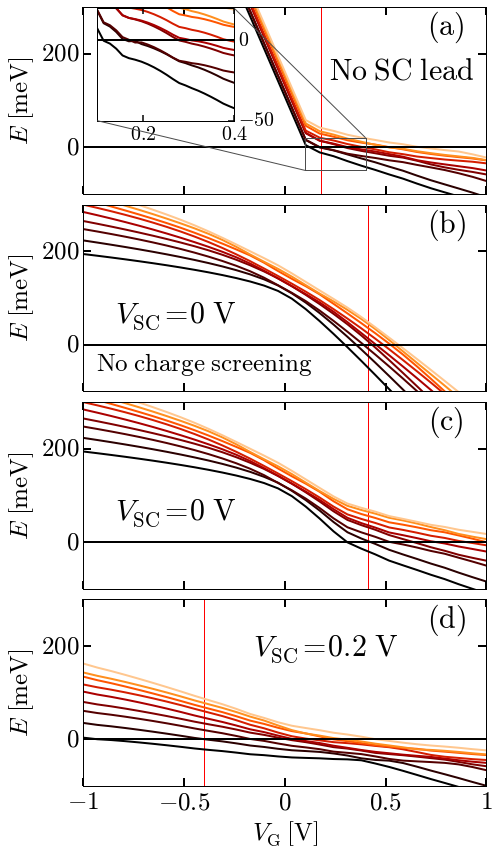

In [10]:
plot_energy_levels()

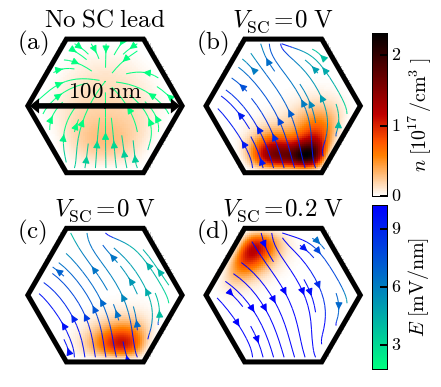

In [16]:
plot_dos_fields()

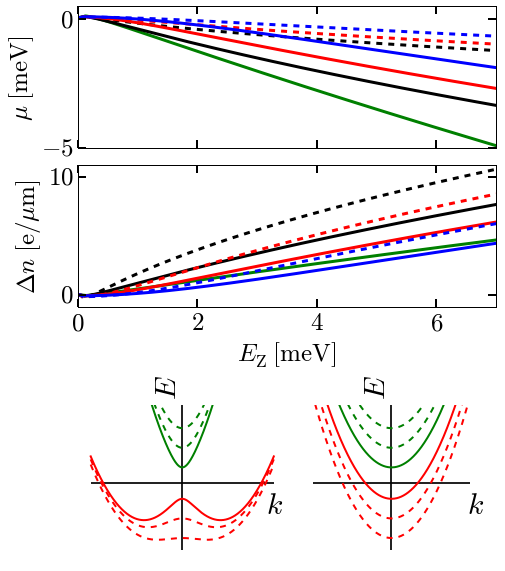

In [25]:
plot_mu_single_band()

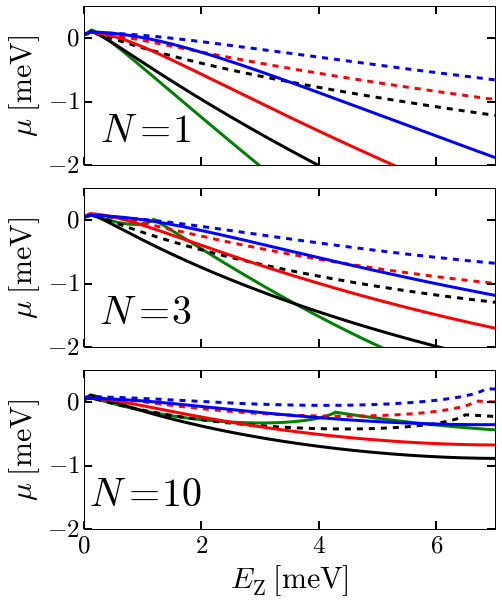

In [79]:
plot_mu_multiple_bands()

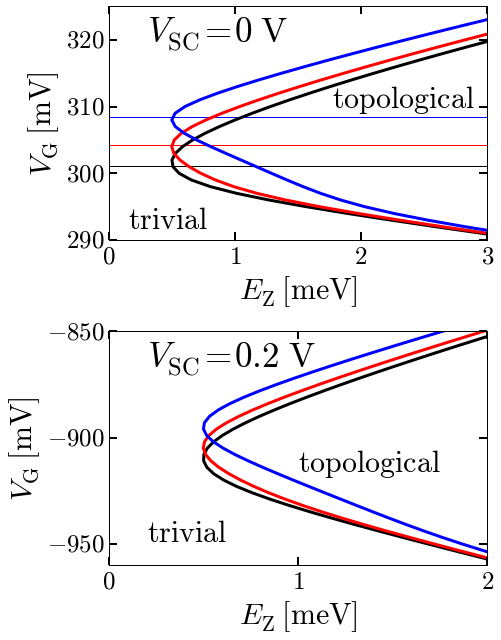

In [32]:
plot_phase_bound()

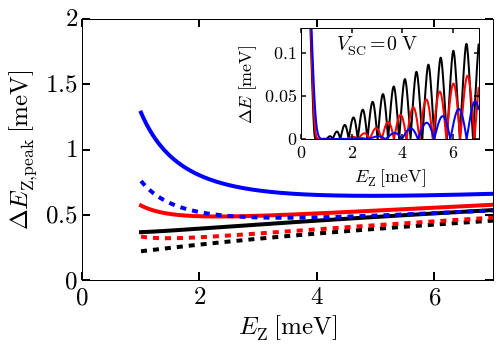

In [22]:
plot_smoking_gun()

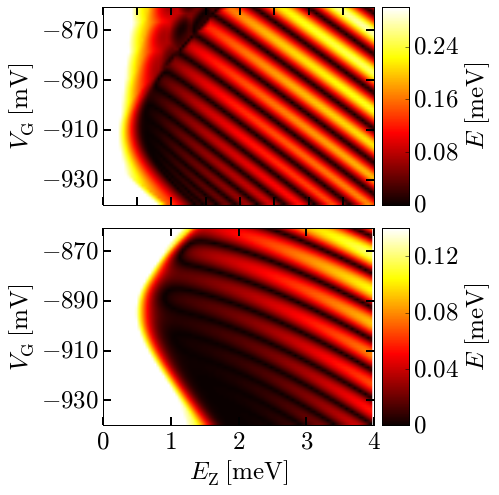

In [23]:
plot_majo_osc_space()

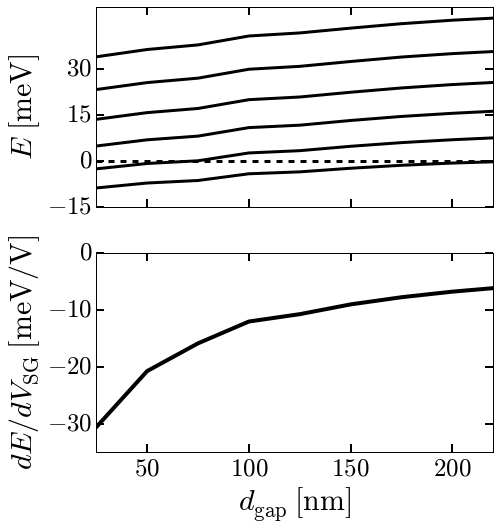

In [24]:
plot_gap_lever_arm()

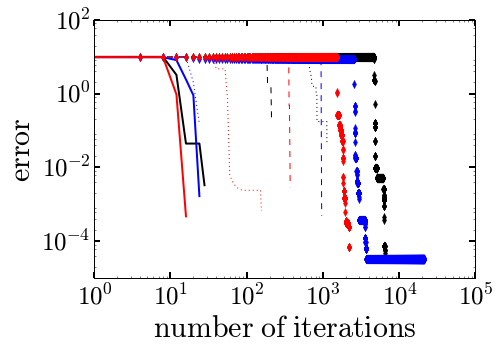

In [66]:
plot_solver_benchmark()